# Cooccurrence Matrix Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@3baf5137

This op creates a [Cooccurrence Matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) of any input image. Let's see how the `Op` is called:

In [2]:
ij.op().help("cooccurrenceMatrix")

Available operations:
	(double[][] out) =
	net.imagej.ops.image.cooccurrenceMatrix.CooccurrenceMatrix2D(
		IterableInterval in,
		int nrGreyLevels,
		int distance,
		MatrixOrientation orientation)
	(double[][] out) =
	net.imagej.ops.image.cooccurrenceMatrix.CooccurrenceMatrix3D(
		IterableInterval in,
		int nrGreyLevels,
		int distance,
		MatrixOrientation orientation)

Note the parameters here:
* `IterableInterval in`: the input image
* `int nrGreyLevels`: the number of different data values within the values, used to compute the size of the output (where the output is a `double[nrGreyLevels][nrGreyLevels]`). For example, if your image is of `UnsignedByteType` and you know that every value in the range [0, 127] exists within the image then `nrGreyLevels` is `128`. However if you know the data only ranges from [0,72] then you can input `nrGreyLevels` as 73, saving memory. 
* `int distance`: the magnitude of the offeset from the current data location that you want to check for cooccurrence. For example, if we want to create a cooccurrence matrix of every data location `p`, located at `[x, y]` and the pixel diagonally offset from `p` at a distance of `[d0, d1]`, the `Op` will check pixels `p` and the pixel at location `[x + d0, y + d1]` for all pixels on the image. Each value of `orientation` is mutliplied by `distance` to determine that offset `[d0, d1]`.
* `MatrixOrientation orientation`: denotes the **direction** on which to travel to find the offset pixel. There are separate `MatrixOrientation` classes for two- and three-dimensional cooccurrence matrices, and each have enums denoting the most common offsets, although you can still create a new MatrixOrientation2D or 3D with your own `[d0, d1(, d2)]` if you so choose.

Also note that the output `double[]` contains the **percentage** of pairs that follow that pattern, not the **number** of pairs.

Let's create a new input image:

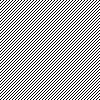

In [3]:
import net.imglib2.type.numeric.integer.UnsignedByteType
    
dims = [100, 100] as int[]
data = ij.op().run("create.img", dims, new UnsignedByteType())

cursor = data.cursor()
while(cursor.hasNext()) cursor.next().set(((cursor.getIntPosition(0) + cursor.getIntPosition(1)) % 3) * 255)

ij.notebook().display(data)

This equation assigns two data locations that are horizontal neighbors with the maximum value of the type (where the modulus is 1 and 2), followed by an "off" pixel (where the modulus is 0). This works out well for cooccurrence between a data location at location `[x, y]` and a data location at location `[x + 1, y + 1]`. We should then expect to see large (equilavlent, to be precise) percentages of 1 and 1, 0 and 1, and 1 and 0 respectively, however no values of 0 and 0 respectively, since there are no data locations with a value of zero that also have a zero as a horizontal neighbor in this image.

In [4]:
import net.imglib2.type.numeric.integer.UnsignedByteType
import net.imagej.ops.image.cooccurrenceMatrix.MatrixOrientation2D

//we only have values of 0 and 255
nrGreyLevels = 2

//we want an offset of one
distance = 1

//we need a MatrixOrientation2D of a horizontal orientation
orientation = MatrixOrientation2D.HORIZONTAL

output = ij.op().run("cooccurrenceMatrix", data, nrGreyLevels, distance, orientation)

[[0.0, 0.3333333333333333], [0.3333333333333333, 0.3333333333333333]]

Note that in this output the first value is `output[0, 0]`, and the last value is `output[1, 1]`. The output came out exactly as intended, with the pattern `[0, 0]` returning 0% of the total image (for the reasons described above) and all other patterns returning 33% of the patterns.